In [1]:
# Install required libraries (if not already installed)
!pip install pandas scikit-learn matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [9]:
df = pd.read_csv("bank-marketing.csv", sep=',')

In [6]:
df.head()

,"age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit"
0,"59,admin.,married,secondary,no,2343,yes,no,unk..."
1,"56,admin.,married,secondary,no,45,no,no,unknow..."
2,"41,technician,married,secondary,no,1270,yes,no..."
3,"55,services,married,secondary,no,2476,yes,no,u..."
4,"54,admin.,married,tertiary,no,184,no,no,unknow..."


In [10]:
# Target variable distribution
print("\nTarget variable distribution:\n", df['deposit'].value_counts())

# Check missing values
print("\nMissing values:\n", df.isnull().sum())



Target variable distribution:
 deposit
no     5873
yes    5289
Name: count, dtype: int64

Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [12]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('deposit_yes', axis=1)
y = df_encoded['deposit_yes']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Initialize model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train model
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)


Accuracy: 0.8056426332288401


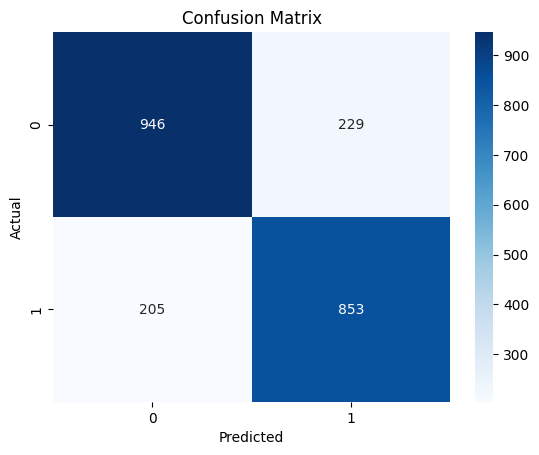


Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.81      0.81      1175
        True       0.79      0.81      0.80      1058

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [14]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


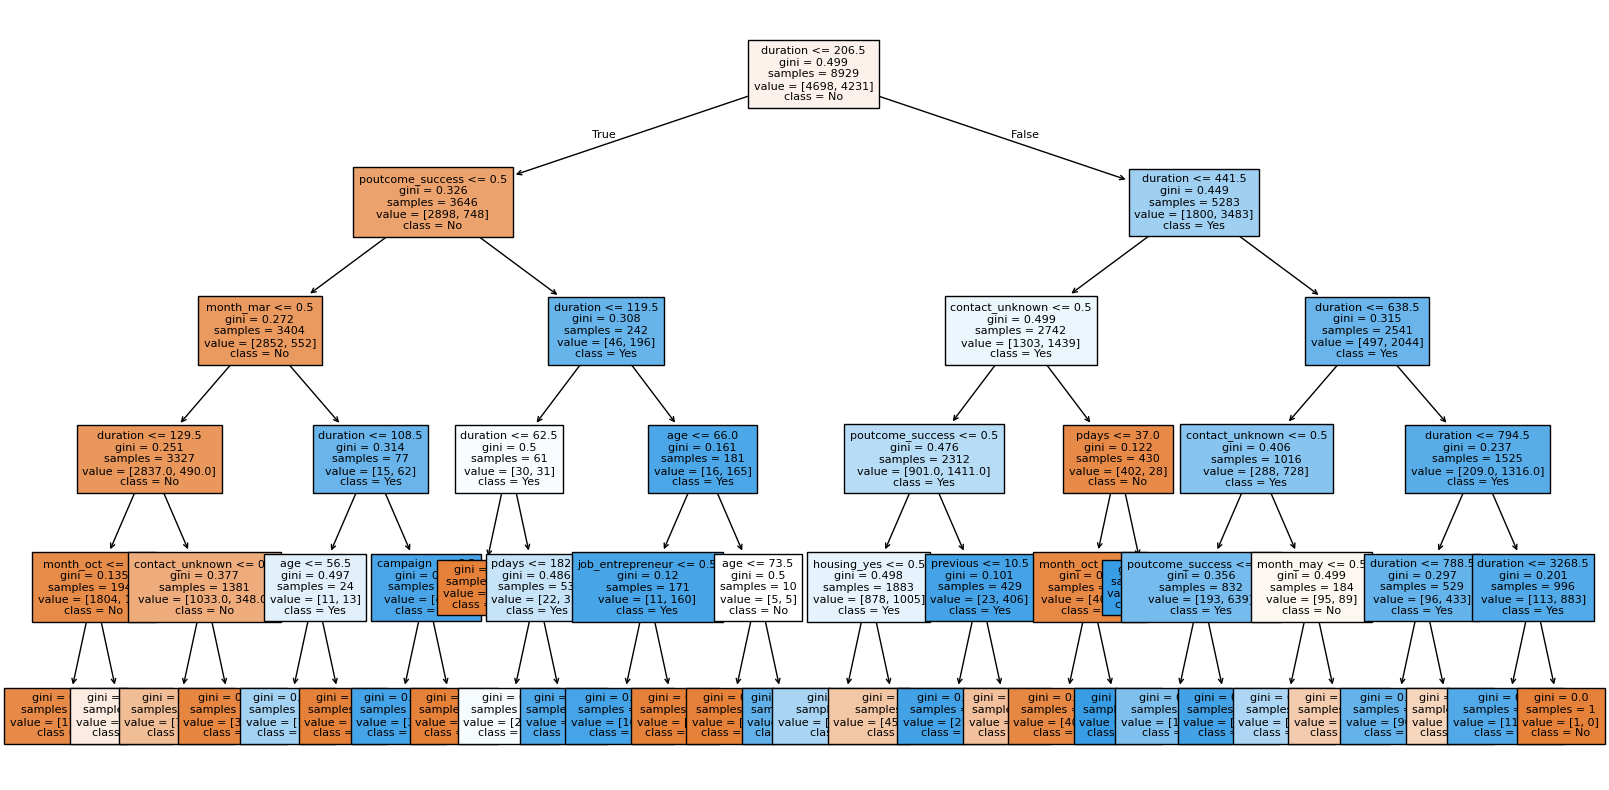

In [15]:
# Plot decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['No','Yes'], filled=True, fontsize=8)
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# GridSearch
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-validation Accuracy:", grid.best_score_)


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best Cross-validation Accuracy: 0.8177836330500845


Tuned Model Accuracy: 0.8199731303179579


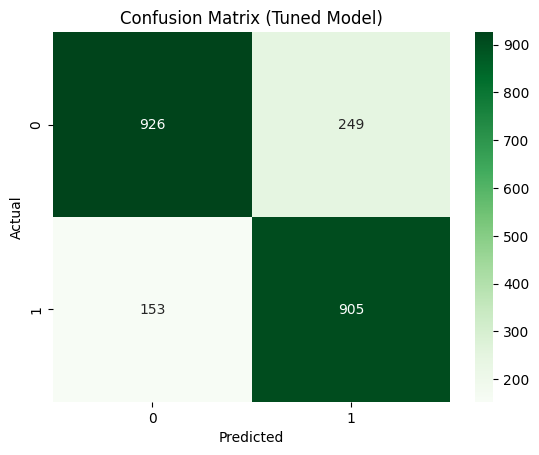


Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.79      0.82      1175
        True       0.78      0.86      0.82      1058

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



In [17]:
# Best model from GridSearch
best_dt = grid.best_estimator_

# Predictions
y_pred_best = best_dt.predict(X_test)

# Accuracy
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Tuned Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


/tmp/ipython-input-3355692021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importance_df, palette="viridis")


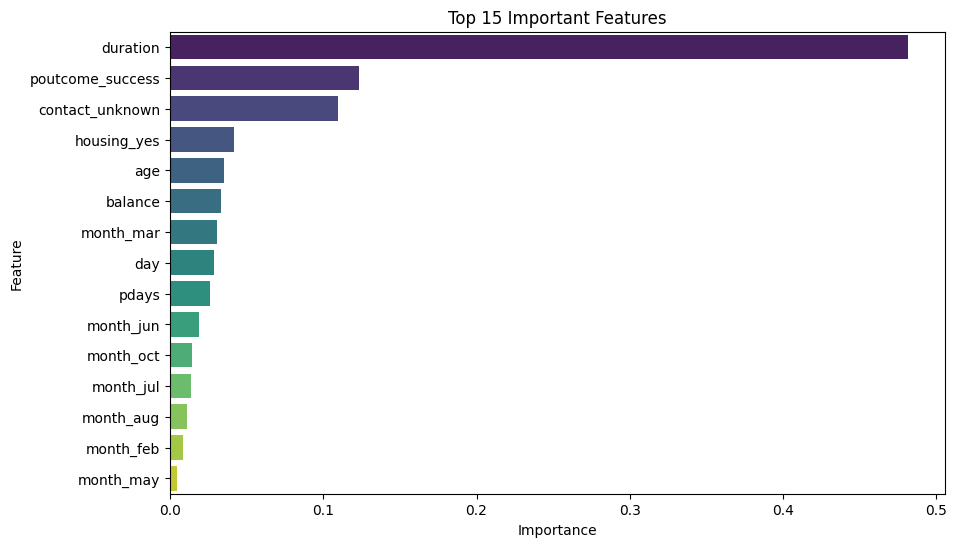

In [18]:
# Feature importance
importances = best_dt.feature_importances_
features = X.columns

# Create DataFrame
feat_importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_importance_df = feat_importance_df.sort_values(by="Importance", ascending=False).head(15)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importance_df, palette="viridis")
plt.title("Top 15 Important Features")
plt.show()
